### Residual Analysis

#### 1.) Auto-Correlation amongst errors:
    a.) ACF Plot
    b.) L-Jung Test (general)
    c) breusch_godfrey test (suitable for regression models)
#### 2.) Non-Linearity / heteroscedasticity / outliers
    a.) residual vs Fitted values plot
    b.) residual vs predictors plot
    c.) residual line plot
    d.) Harvey-Collier multiplier test - This test is a t-test that the mean of the recursive ols residuals is zero.
    e.) Breusch-Pagan test - Homoscedasticity
#### 3.) Normal Distribtuion 
    a.) Q-Q plot
    b.) Histogram plot

In [5]:
#import all important modules
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
class checkResidual():
    def __init__(self, params=None):
        self.params = params
        
    def res_pred_plot(self,residual, pred_val):
        fig, ax = plt.subplots(figsize=(6,2.5))
        _ = ax.scatter(residual, pred_val)
    
    def __call__(self, residual, pred_val):
        #call residual vs predictor plot
        self.res_pred_plot(residual, pred_val)

# test example

In [18]:
df = statsmodels.datasets.get_rdataset("Ginzberg", "carData").data
df = df[['adjdep', 'adjfatal', 'adjsimp']]
df.head(2)

,adjdep,adjfatal,adjsimp
0,0.41865,0.10673,0.75934
1,0.51688,0.99915,0.72717


In [19]:
reg = smf.ols('adjdep ~ adjfatal + adjsimp', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 adjdep   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     30.19
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           1.82e-10
Time:                        17:17:46   Log-Likelihood:                -35.735
No. Observations:                  82   AIC:                             77.47
Df Residuals:                      79   BIC:                             84.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2492      0.105      2.365      0.021       0.039       0.459
adjfatal       0.3845      0.100      3.829      0.000       0.185       0.584
adjsimp        0.3663      0.100      3.649      0.000       0.166       0.566
==============================================================================
Omnibus:                       10.510   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.561
Skew:                           0.836   Prob(JB):                      0.00509
Kurtosis:                       3.542   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred_val = reg.fittedvalues.copy()
true_val = df['adjdep'].values.copy()
residual = true_val - pred_val

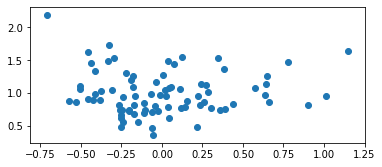

In [21]:
checkResidual()(residual, pred_val)